In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

c:\Users\sharm\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\sharm\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\sharm\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Loading Data

In [2]:
pd.options.display.float_format = '{:.2f}'.format
df = pd.read_csv(r'predictive_maintenance_dataset.csv')
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


# Checking properties of features
(Checking how many features are numerical & how many are categorical)

In [3]:
print(df.shape)
df.info()

(124494, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


# Statsical Overview of Data
(10 & 90 percentiles can be helpful for detecting outliers. Outliers will be treated later.)

In [4]:
# Its seems like metric7 & metric8 have identical distribution.
df.describe(percentiles=[.10,.25,.50,.75,.90])

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00,124494.00
mean,0.00,122388103.24,159.49,9.94,1.74,14.22,260172.66,0.29,0.29,13.01
std,0.03,70459334.22,2179.68,185.75,22.91,15.94,99151.08,7.44,7.44,275.66
min,0.00,0.00,0.00,0.00,0.00,1.00,8.00,0.00,0.00,0.00
10%,0.00,24285120.00,0.00,0.00,0.00,6.00,192870.00,0.00,0.00,0.00
25%,0.00,61284762.00,0.00,0.00,0.00,8.00,221452.00,0.00,0.00,0.00
50%,0.00,122797388.00,0.00,0.00,0.00,10.00,249799.50,0.00,0.00,0.00
75%,0.00,183309640.00,0.00,0.00,0.00,12.00,310266.00,0.00,0.00,0.00
90%,0.00,219471466.40,0.00,0.00,0.00,21.00,370653.40,0.00,0.00,3.00
max,1.00,244140480.00,64968.00,24929.00,1666.00,98.00,689161.00,832.00,832.00,70000.00


In [5]:
# For checking no. of Devices. 
## There are total 1169 devices
df['device'].value_counts()

Z1F0QLC1    304
S1F0KYCR    304
S1F0E9EP    304
S1F0EGMT    304
S1F0FGBQ    304
           ... 
W1F1CHZK      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
W1F1DA5ÿ      1
Name: device, Length: 1169, dtype: int64

# EDA

In [6]:
# Null values percentage 
df.isnull().sum()/df.shape[0]*100

date      0.00
device    0.00
failure   0.00
metric1   0.00
metric2   0.00
metric3   0.00
metric4   0.00
metric5   0.00
metric6   0.00
metric7   0.00
metric8   0.00
metric9   0.00
dtype: float64

In [7]:
# Now seperation of features into categorical & numerical. Since in this dataset all metric features are numerical, will skip this step.
# Also features having null values are identified & segregated into categorical & numerical. 
# Since there are no null values, num_var_miss & cat_var_miss will be empty lists
# The code for doing all this given below. 
isnull_sum = df.isnull().sum()

num_vars = df.select_dtypes(include=["int64", "float64"]).columns
num_vars_miss = [var for var in num_vars if isnull_sum[var]>0]

cat_vars = df.select_dtypes(include=["object"]).columns
cat_vars_miss = [var for var in cat_vars if isnull_sum[var]>0]

print(len(num_vars),len(num_vars_miss),len(cat_vars),len(cat_vars_miss))

10 0 2 0


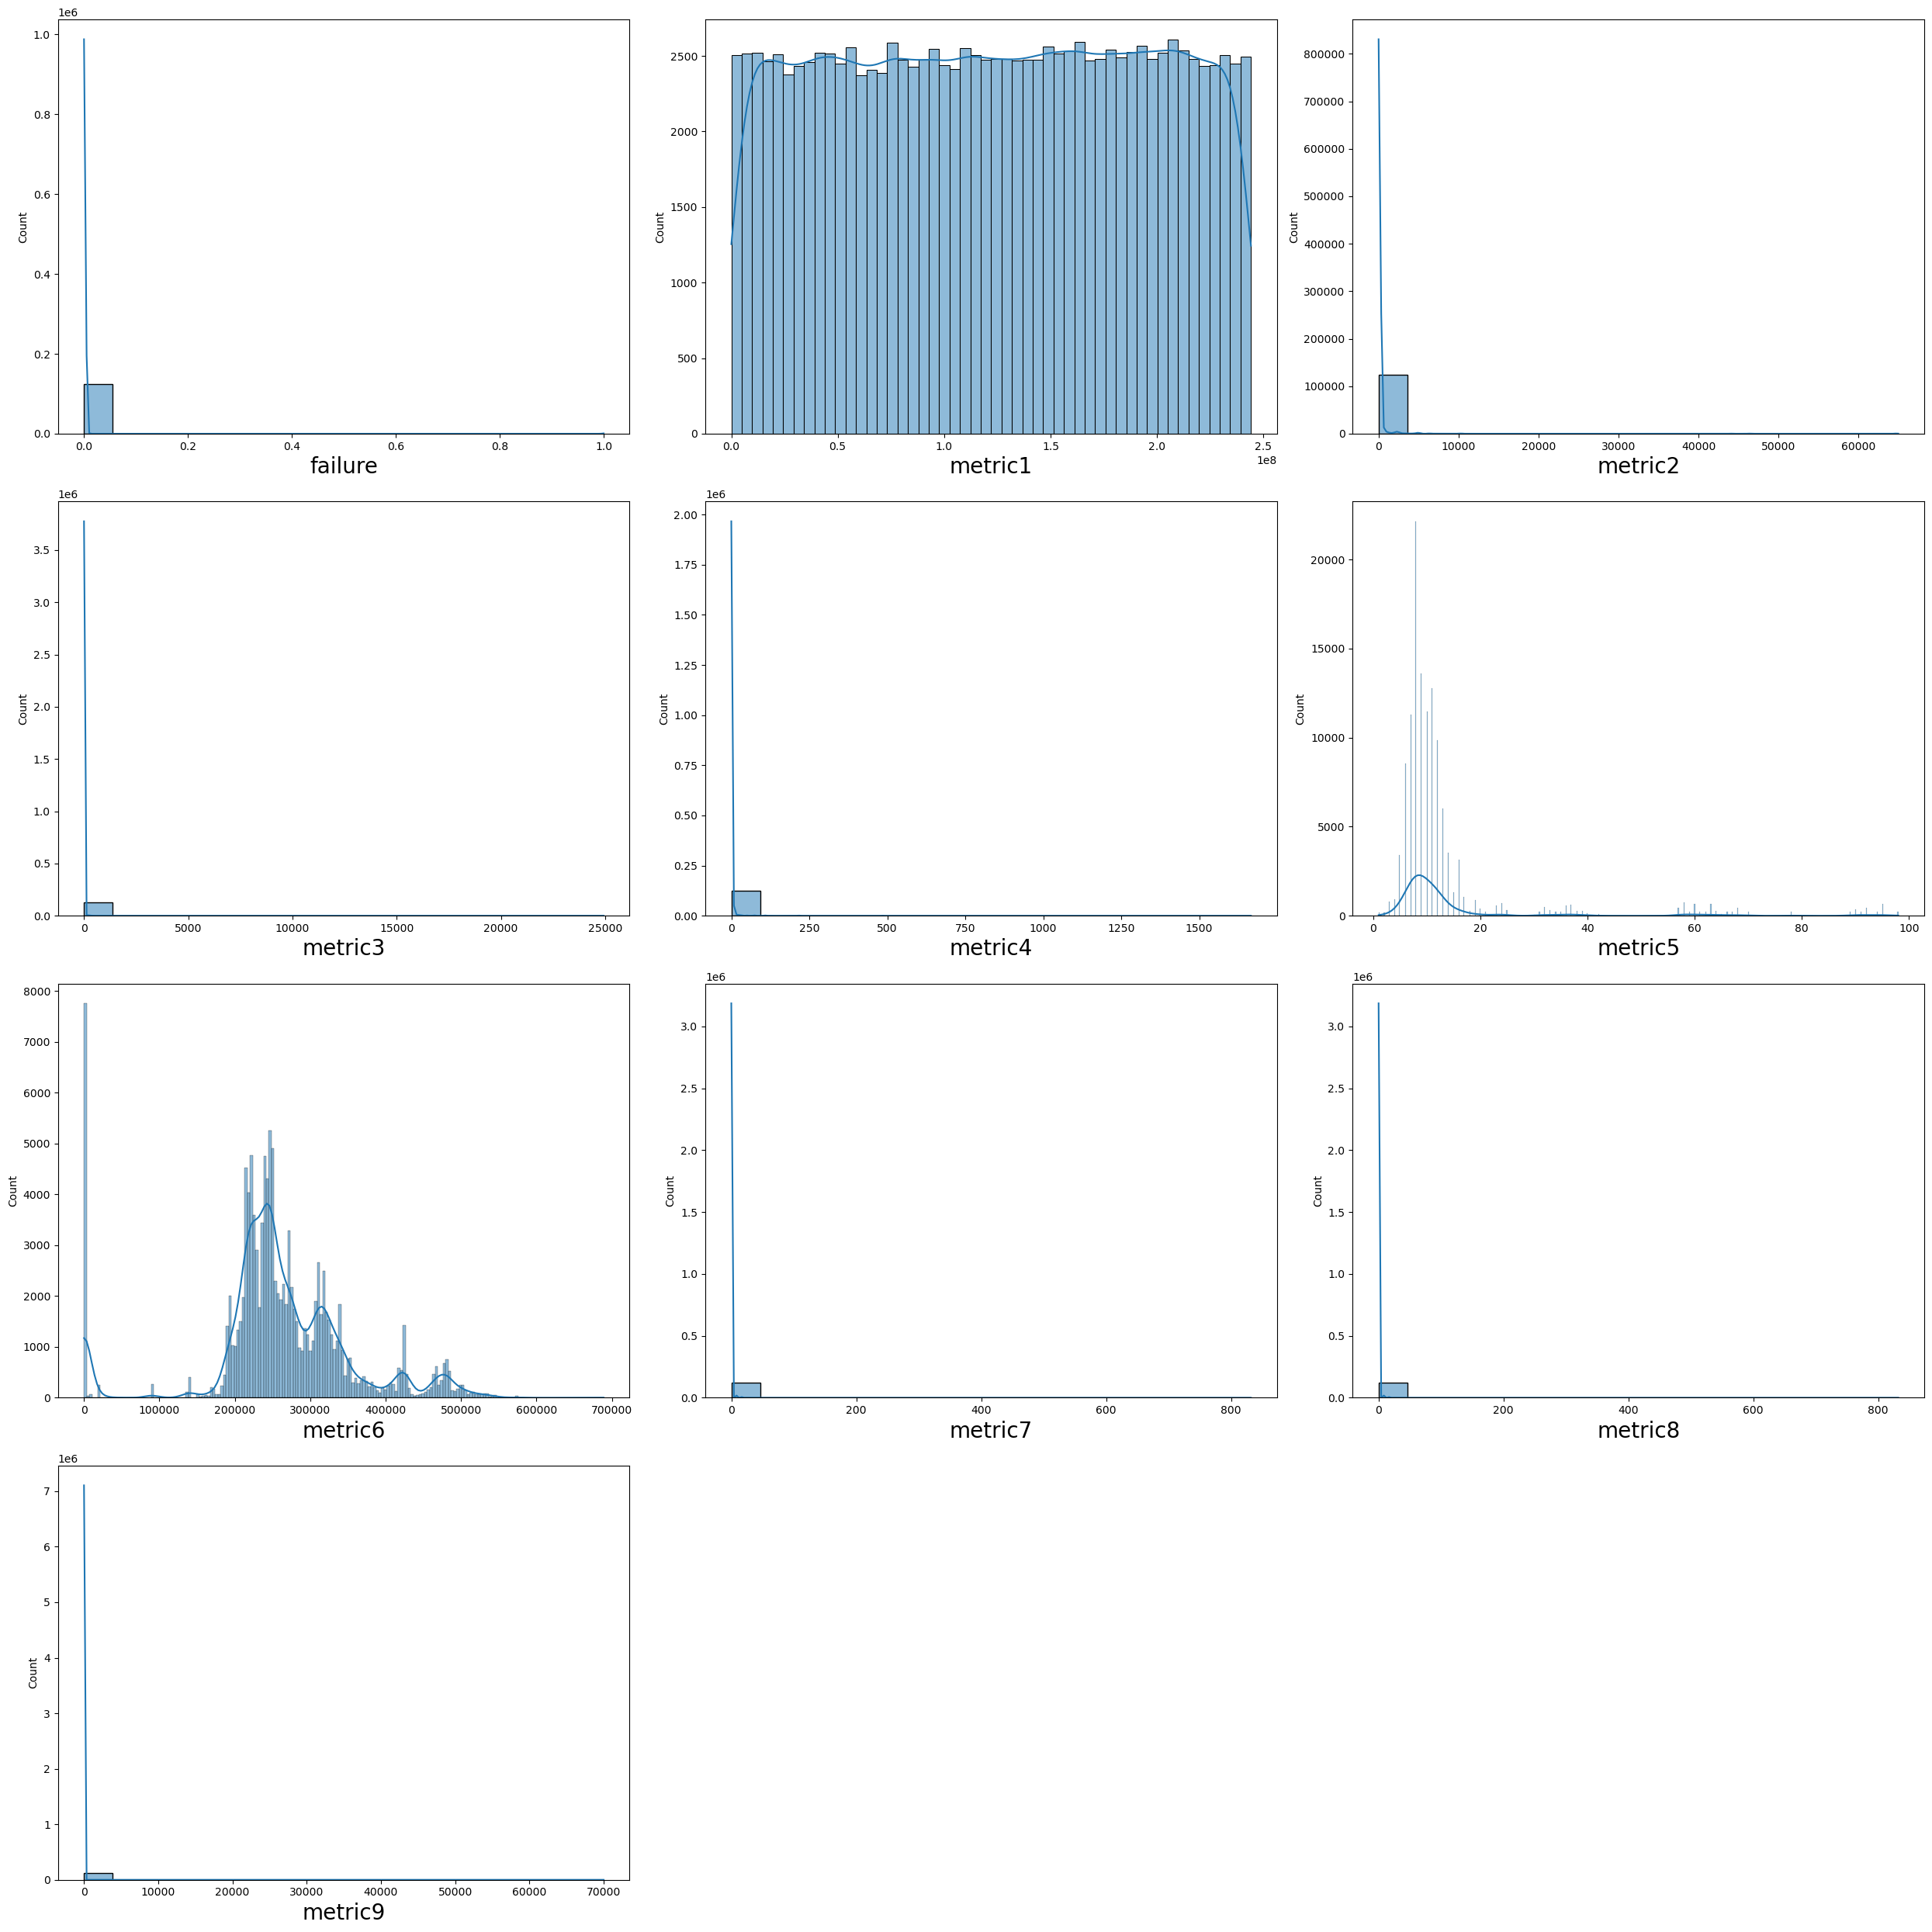

In [8]:
# Histplot is plotted for all numerical features
plt.figure(figsize=(25,25),dpi=100,facecolor='white')
plotnum=1
for column in num_vars:
    ax = plt.subplot(4,3,plotnum)
    sns.histplot(df[column],kde=True)
    plt.xlabel(column,fontsize=20)
    plotnum+=1
plt.tight_layout()

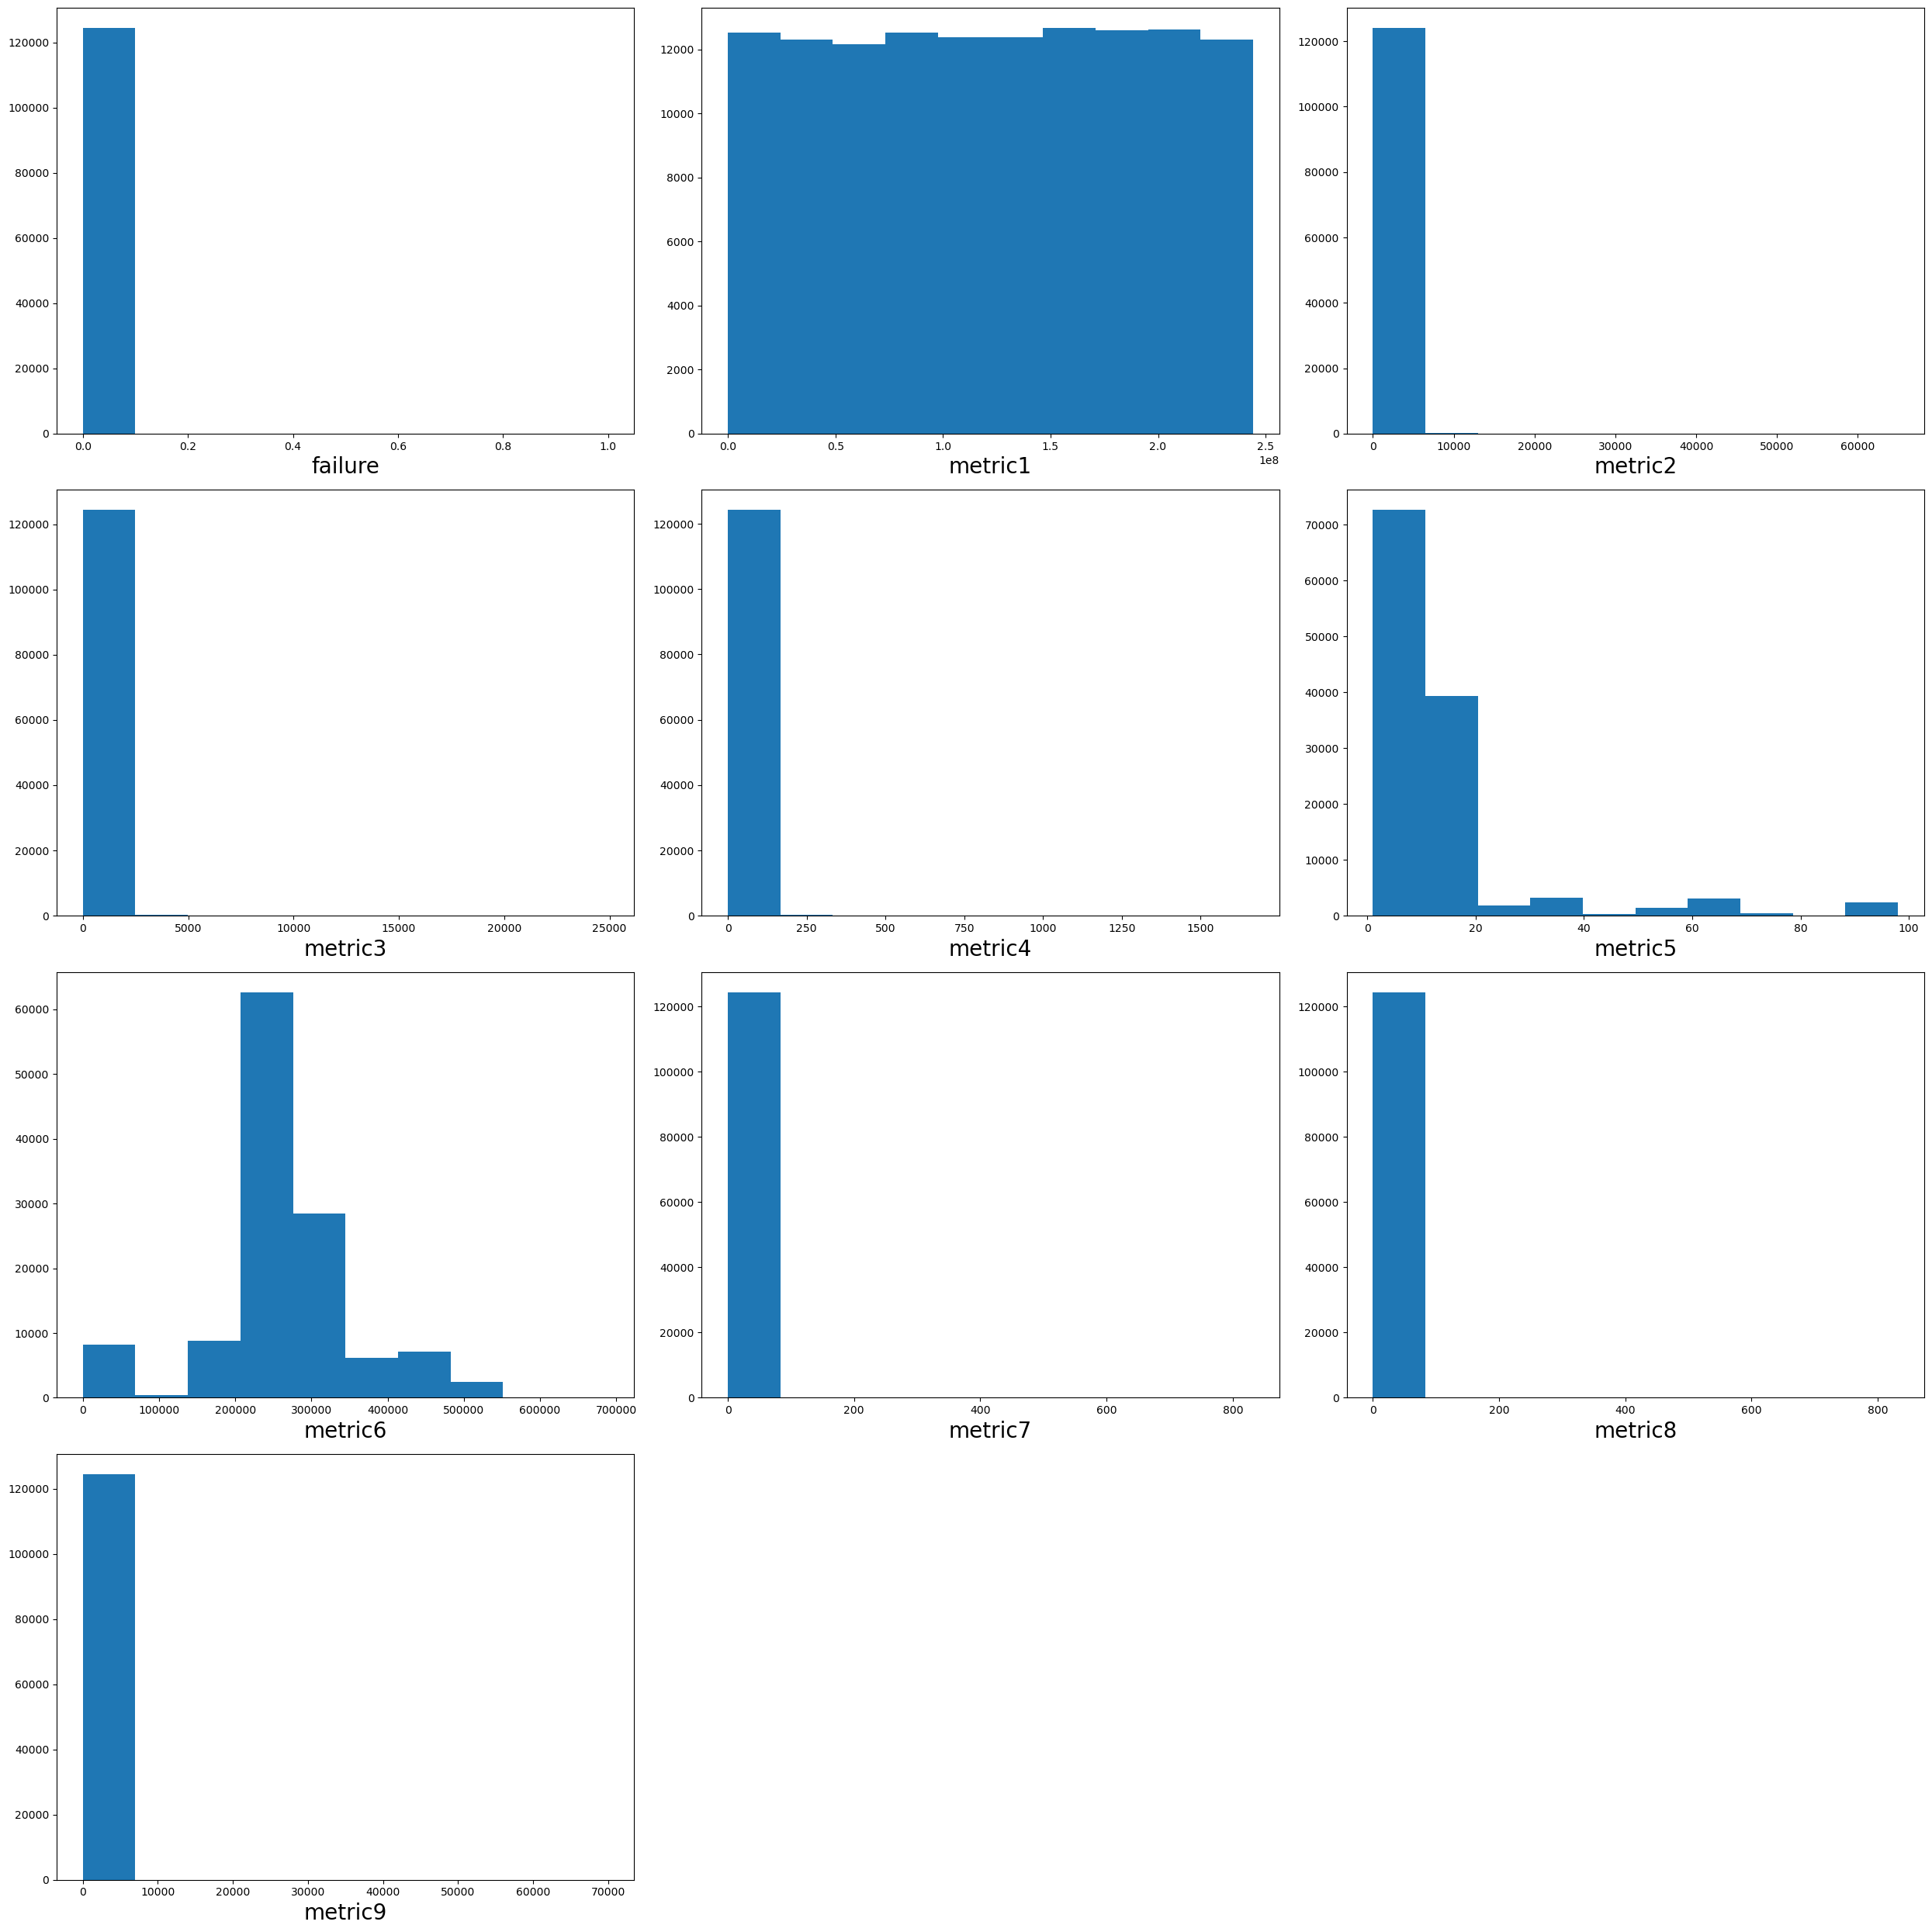

In [9]:
# Histogram is plotted for all numerical features
plt.figure(figsize=(25,25),dpi=100,facecolor='white')
plotnum=1
for column in num_vars:
    ax = plt.subplot(4,3,plotnum)
    plt.hist(x=df[column])
    plt.xlabel(column,fontsize=20)
    plotnum+=1
plt.tight_layout()

Now pandas.skew() method will be used to check the skewness

In [10]:
# A values in the range [-1,1] means not skewed. Thus here we can see that the data is heavily skewed.
df.skew(numeric_only=True)

failure    34.23
metric1    -0.01
metric2    23.86
metric3    82.71
metric4    41.50
metric5     3.48
metric6    -0.38
metric7    73.48
metric8    73.48
metric9   148.16
dtype: float64

As previously stated since a few ML models require data to be normally distributed, We will now explore different gausians transformations to normally fit our data

In [11]:
import scipy.stats as stat
import pylab 
data = df.copy()

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.title(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

<Figure size 2500x2500 with 0 Axes>

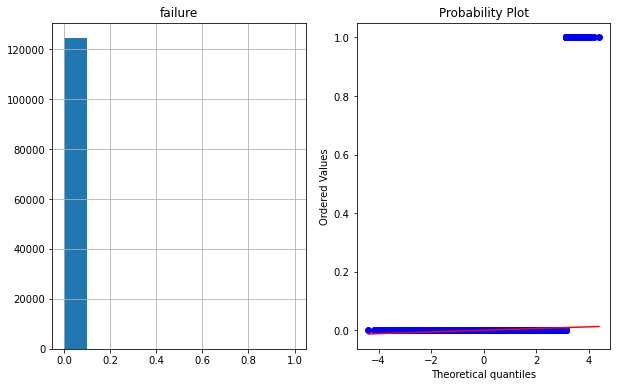

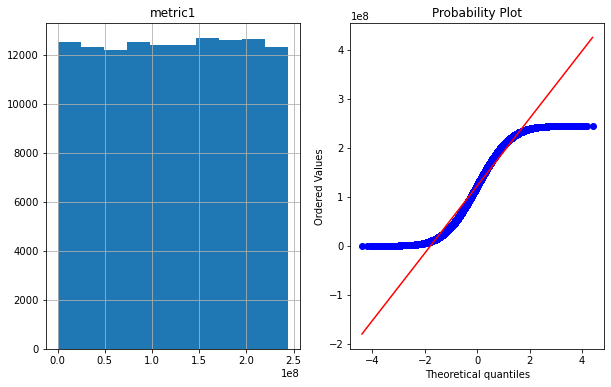

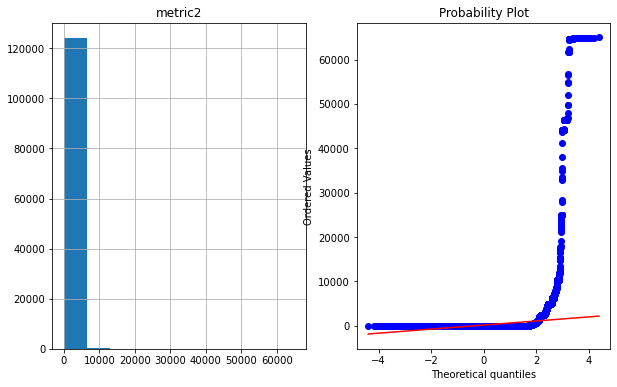

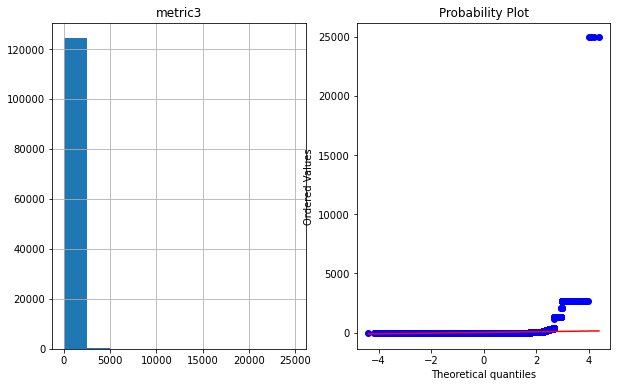

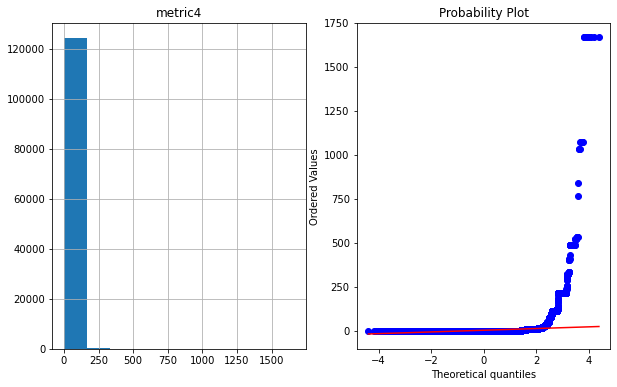

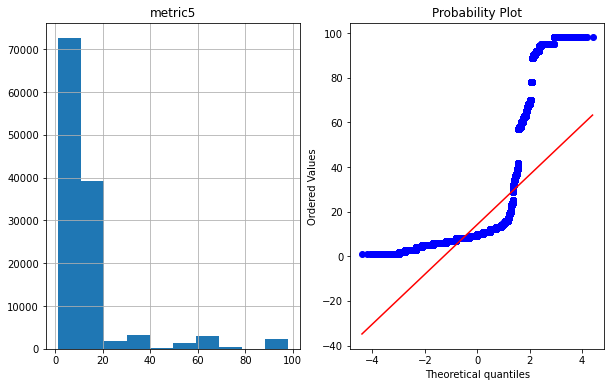

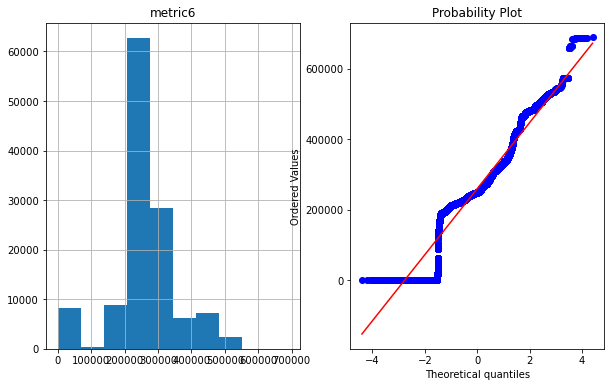

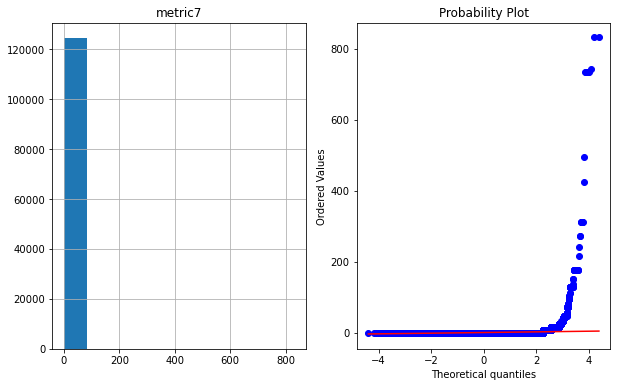

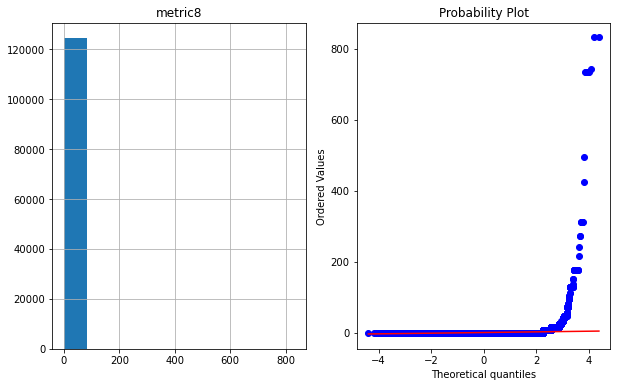

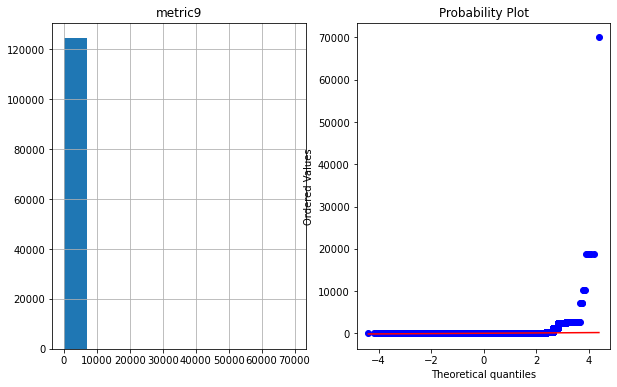

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(25,25),dpi=100)
for column in num_vars:
    plot_data(df,column)
plt.tight_layout()
plt.show()

From the above plots we conclude that:-
1. Metric 1:- Normally distributed
2. Metric 2:- Heavily right skewed distribution
3. Metric 3:- Heavily right skewed distribution
4. Metric 4:- Heavily right skewed distribution
5. Metric 5:- Right skewed distribution
6. Metric 6:- Kindoff normally distributed
7. Metric 7:- Heavily right skewed distribution
8. Metric 8:- Heavily right skewed distribution
9. Metric 9:- Heavily right skewed distribution

- Metric7 & Metric8 are indeed same in terms of distribution thus we can drop one of them.
Since regression algorithms like linear regression, logistic regression require data to be normally distributed it is important to make data normally distributed using transformation technique.

Now different types of transformations will be applied. Since features have 0 values, we cannot use log & reciprocal transformation. 
Also we cannot apply boxcox tranformation since it require data to be strictly positive. Our data contains 0 which is neither +ve nor -ve

NOTE:-Though we can perform log & other transformations by adding 1. But it been observed (as shown below) that log-trans makes the data more skewed & standardization & normalization perform better then them.

15.311913716357296


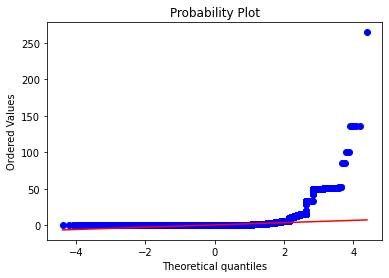

In [13]:
# For log transformation
# data['metric9_log']=np.log(data['metric9'])
# plot_data(df,'metric9_log')

#For reciprocal transformation
# data['metric9_rec']=1/(data['metric9'])
# plot_data(df,'metric9_rec')

#For Squareroot transformation
# data['metric9_sqrt']=data['metric9']**(1/2)
# plot_data(df,'metric9_sqrt')

# Boxcox transformation
# data['metric9_box'],parameters=stat.boxcox(data['metric9'])
# print(parameters)
# print(data['metric9_box'].skew())
# plot_data(data,'metric9_box')

data['metric9_sqrt']=data['metric9']**(1/2)
stat.probplot(data['metric9_sqrt'],dist='norm',plot=pylab)
print(data['metric9_sqrt'].skew())

79.18520458774933


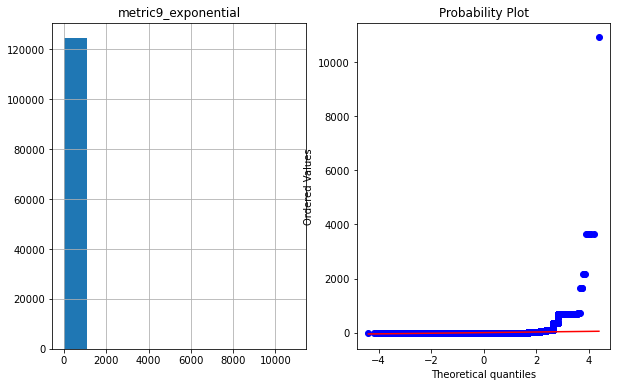

In [14]:
# Exponential Transformation
data['metric9_exponential']=data['metric9']**(1/1.2)
print(data['metric9_exponential'].skew())
plot_data(data,'metric9_exponential')

Now we will apply Standardization & Normalization transformations

In [15]:
data.drop(['metric9_exponential','metric9_sqrt'],axis=1,inplace=True)
data

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [16]:
from sklearn.preprocessing import StandardScaler

scaler1=StandardScaler()
data_scaled1 = scaler1.fit_transform(data.drop(['date','device'],axis=1))
data_scaled1

array([[-2.91919892e-02,  1.32335828e+00, -4.79397125e-02, ...,
        -3.93347209e-02, -3.93347209e-02, -2.18161707e-02],
       [-2.91919892e-02, -8.65998366e-01, -7.31729013e-02, ...,
        -3.93347209e-02, -3.93347209e-02, -4.72097611e-02],
       [-2.91919892e-02,  7.22517035e-01, -7.31729013e-02, ...,
        -3.93347209e-02, -3.93347209e-02, -4.72097611e-02],
       ...,
       [-2.91919892e-02, -1.46693691e+00,  2.14367743e+00, ...,
        -3.93347209e-02, -3.93347209e-02, -4.72097611e-02],
       [-2.91919892e-02,  1.48405780e+00, -7.31729013e-02, ...,
        -3.93347209e-02, -3.93347209e-02, -4.72097611e-02],
       [-2.91919892e-02, -1.48760537e+00, -7.31729013e-02, ...,
        -3.93347209e-02, -3.93347209e-02,  2.53888695e+02]])

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler2=MinMaxScaler()
data_scaled2 = scaler2.fit_transform(data.drop(['date','device'],axis=1))
data_scaled2

array([[0.00000000e+00, 8.83223757e-01, 8.46570619e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e-04],
       [0.00000000e+00, 2.51374455e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.09820707e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 7.79433218e-02, 7.43750770e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.29601711e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.19783954e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [18]:
stat.skew(data_scaled1)


array([ 3.42267812e+01, -1.11428293e-02,  2.38570364e+01,  8.27102163e+01,
        4.15021111e+01,  3.48363741e+00, -3.75280088e-01,  7.34755711e+01,
        7.34755711e+01,  1.48162881e+02])

In [19]:
stat.skew(data_scaled2)

array([ 3.42267812e+01, -1.11428293e-02,  2.38570364e+01,  8.27102163e+01,
        4.15021111e+01,  3.48363741e+00, -3.75280088e-01,  7.34755711e+01,
        7.34755711e+01,  1.48162881e+02])

Now we will be plotting boxplots to detect outliers & heatmap of correlation of all features

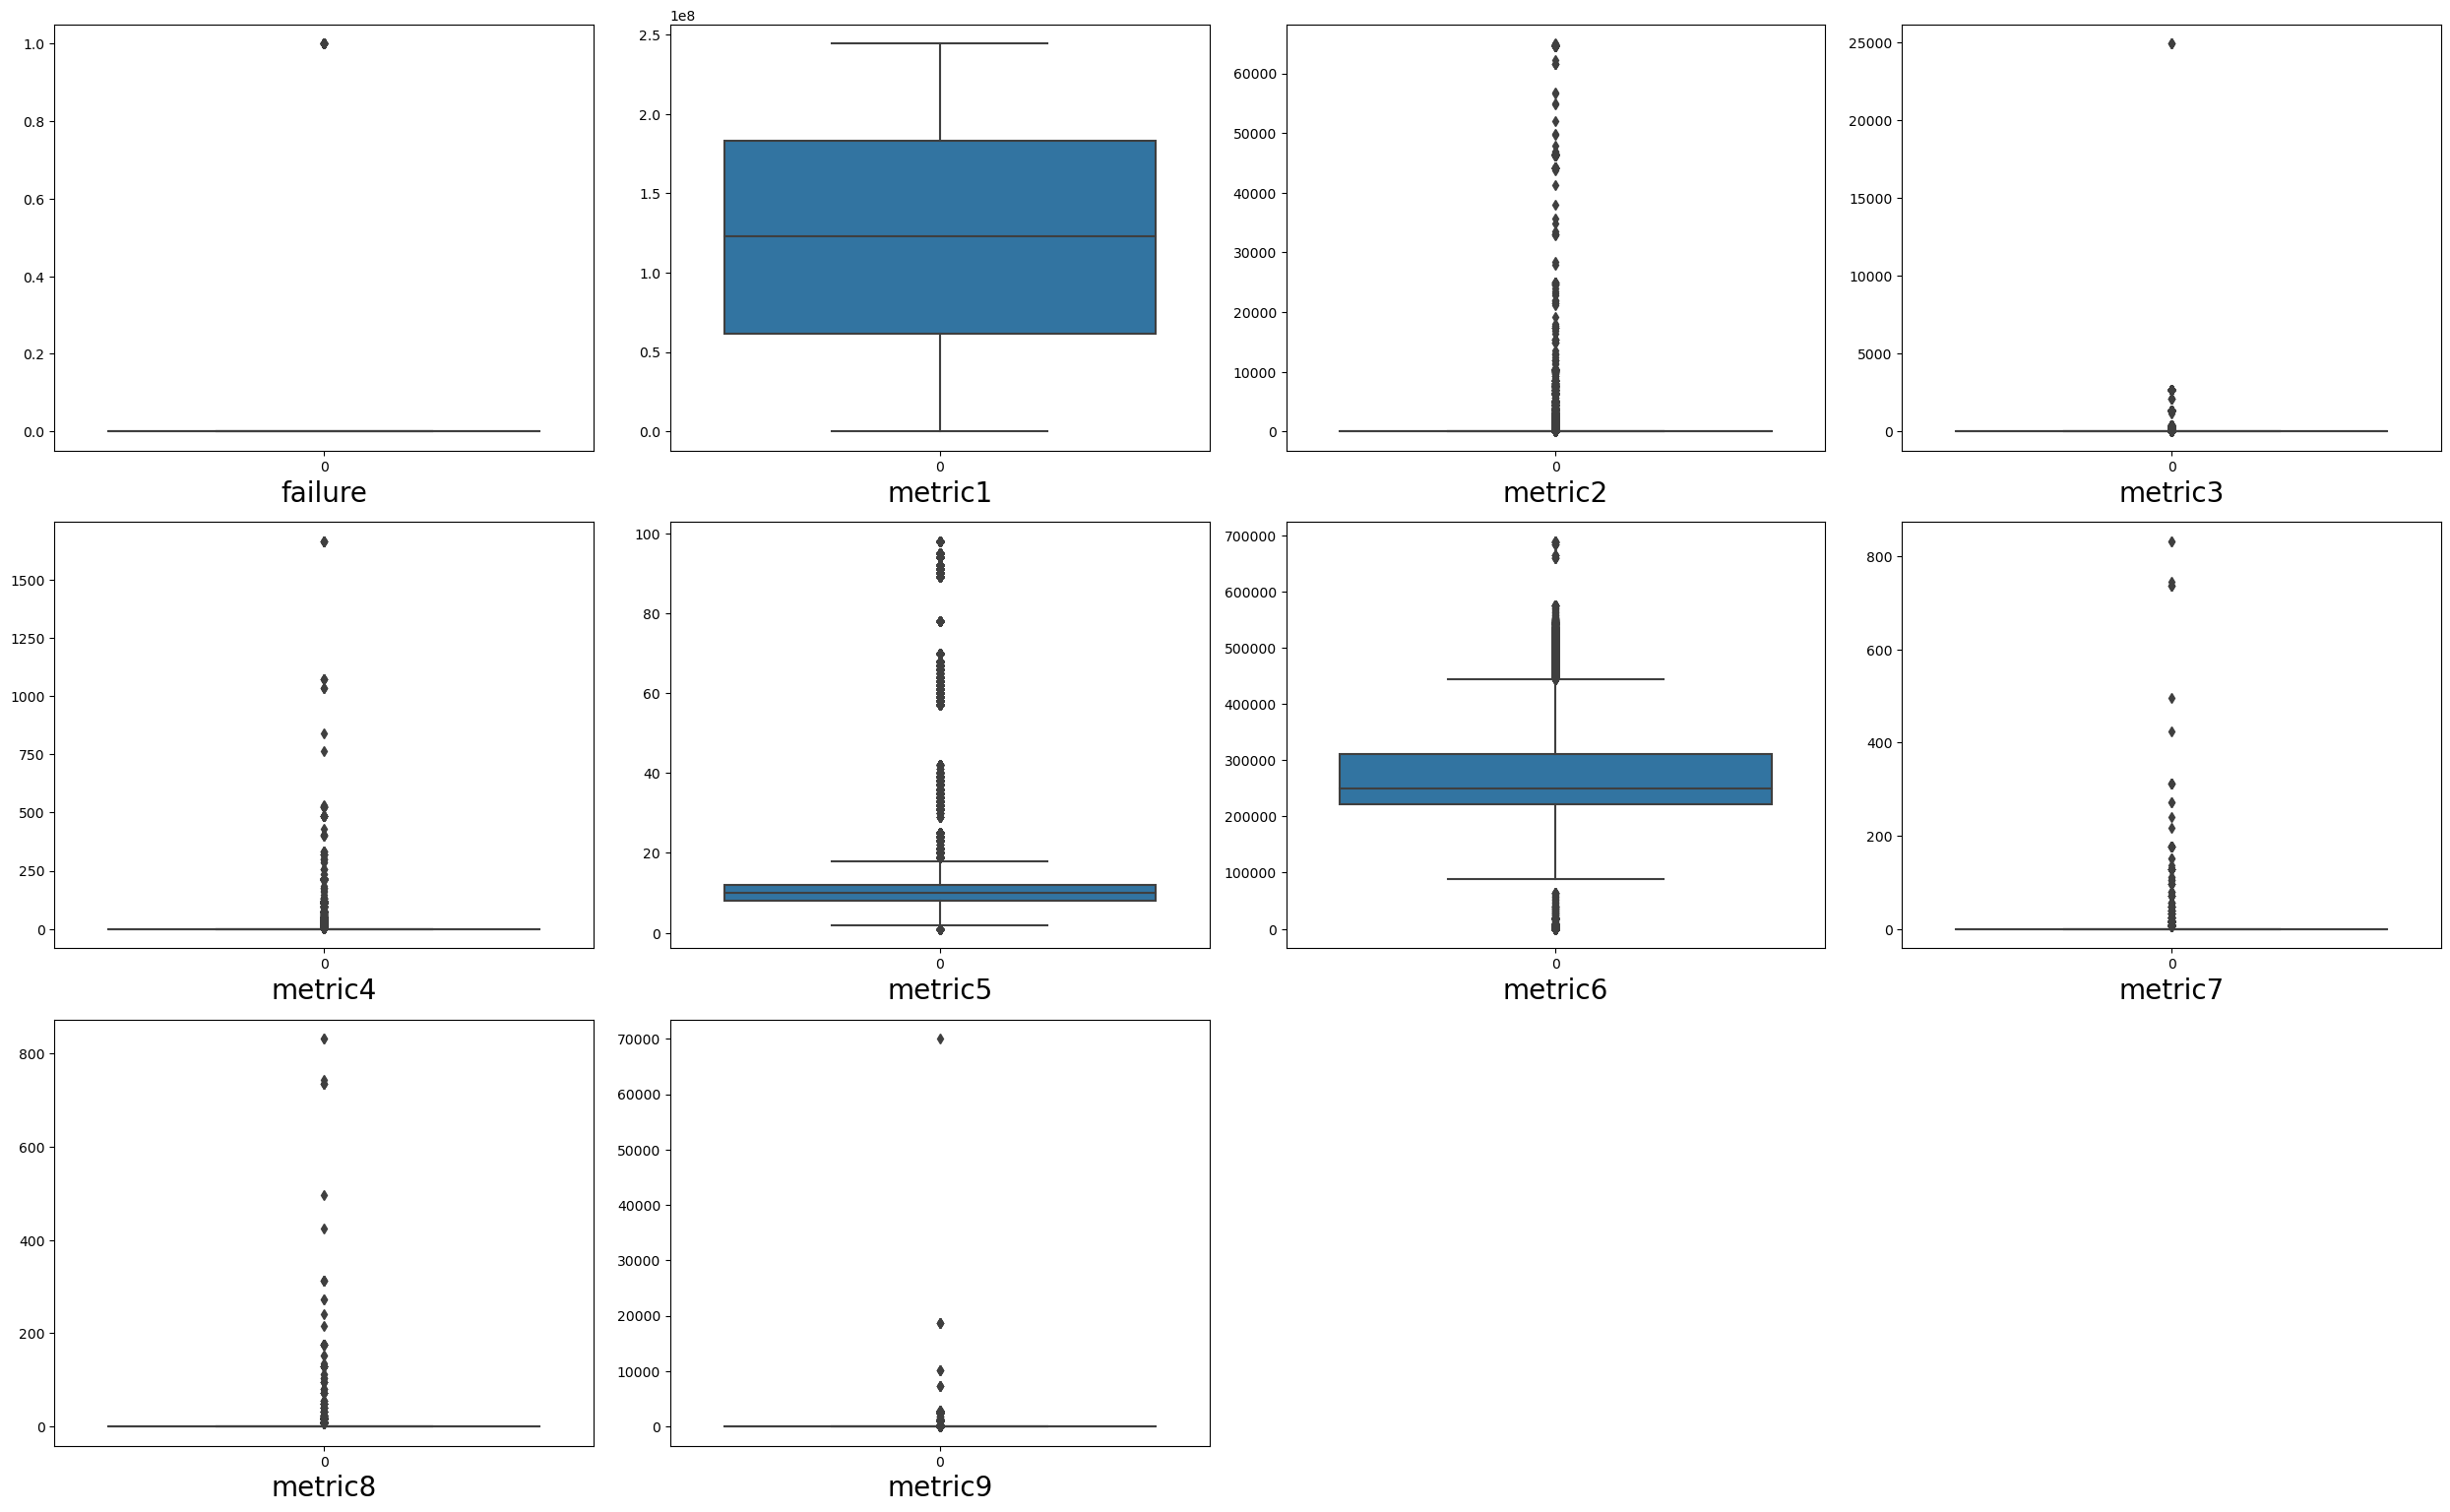

In [20]:
plt.figure(figsize=(25,25),dpi=100)
plotnumber = 1
for column in num_vars:
    ax = plt.subplot(5,4,plotnumber)
    sns.boxplot(data=df[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:>

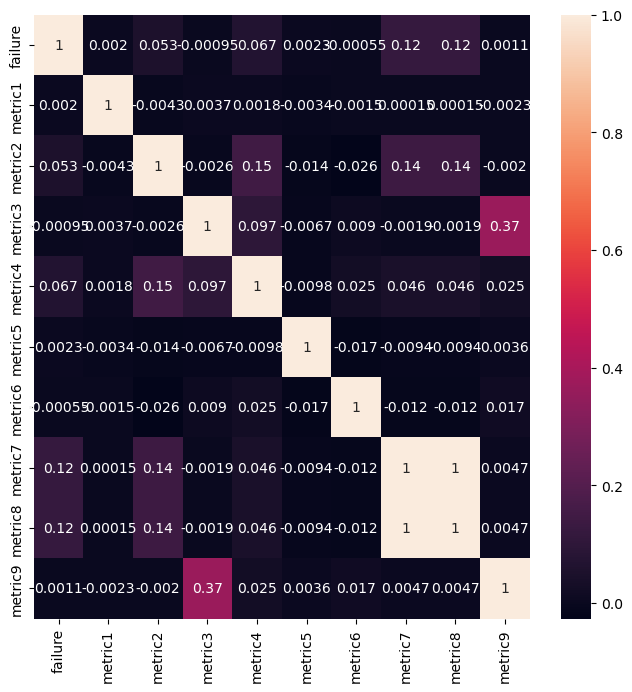

In [21]:
plt.figure(figsize=(8,8),dpi=100)
sns.heatmap(data=df.drop(['date','device'],axis='columns').corr(),annot=True) 

Except for metric 7&8 no strong correlation is observed between the features & btween features & label. This will be more elaborately covered in feature selection part.

Now we will try to see if there is any relation between time & device failure

In [22]:
data.date = pd.to_datetime(data.date)

data['month']=data['date'].dt.month
data['day_of_month']=data['date'].dt.day
data['weekday']=data['date'].dt.weekday
data['weekday'].replace(0,7,inplace=True)
data

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,month,day_of_month,weekday
0,2015-01-01,S1F01085,0,215630672,55,0,52,6,407438,0,0,7,1,1,3
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,1,1,3
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,1,1,3
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,1,1,3
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0,11,2,7
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13,11,2,7
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0,11,2,7
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0,11,2,7


<AxesSubplot:xlabel='month'>

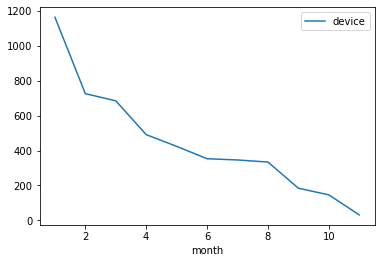

In [23]:
x=data.groupby('month').agg({'device':lambda x: x.nunique()})
x.plot()

From the above graph we can conclude that as the year progresses more number of devices fails

<AxesSubplot:xlabel='month', ylabel='count'>

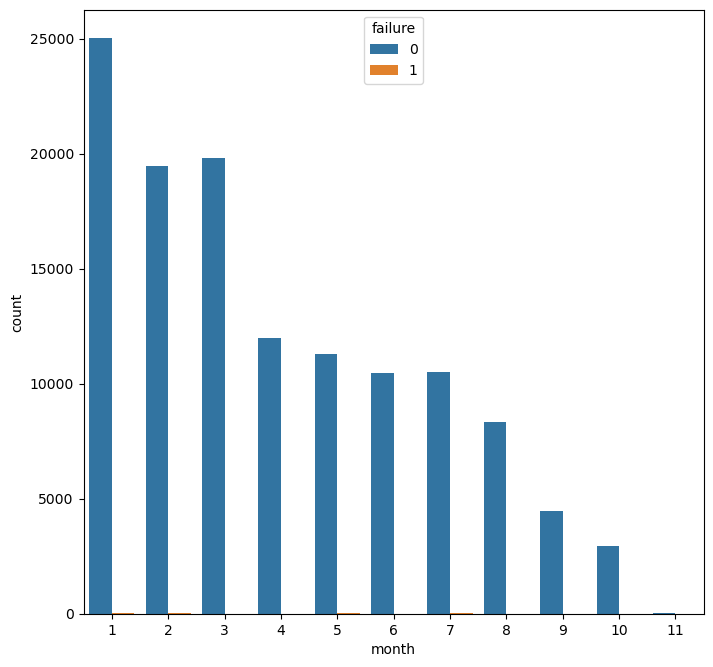

In [24]:
plt.figure(figsize=(8,8),dpi=100)
sns.countplot(x='month',hue='failure',data=data)

From the above we can conclude that most of the device fail in the first two months of the year

<AxesSubplot:xlabel='day_of_month', ylabel='count'>

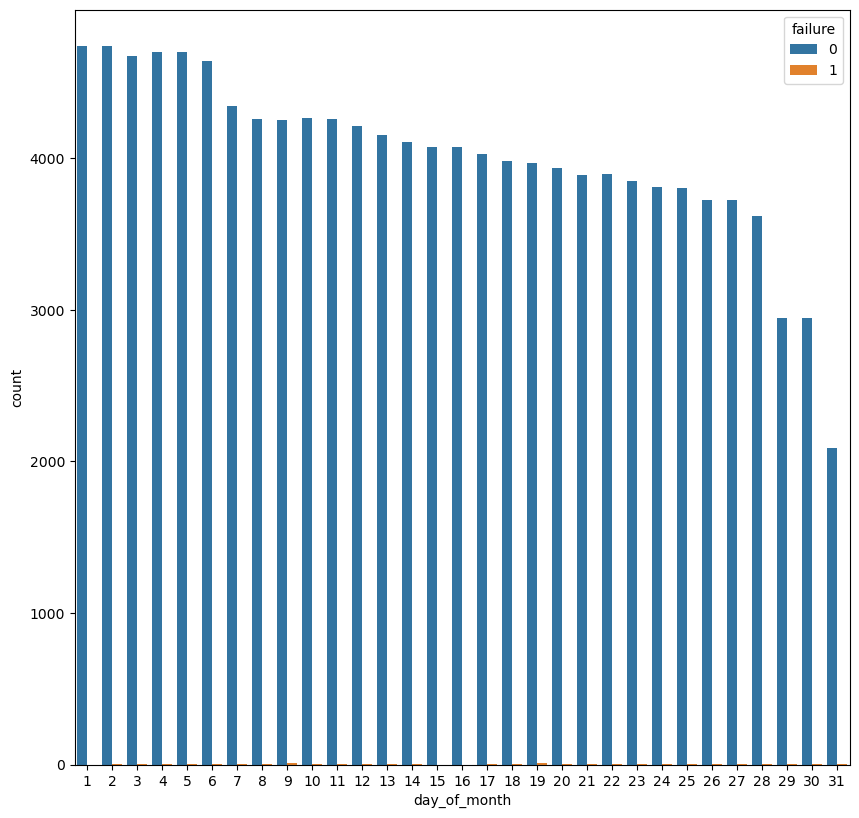

In [25]:
# Now we will see if there's is any relation between month dates & device failure
plt.figure(figsize=(10,10),dpi=100)
sns.countplot(x='day_of_month',hue='failure',data=data)

<AxesSubplot:xlabel='weekday', ylabel='count'>

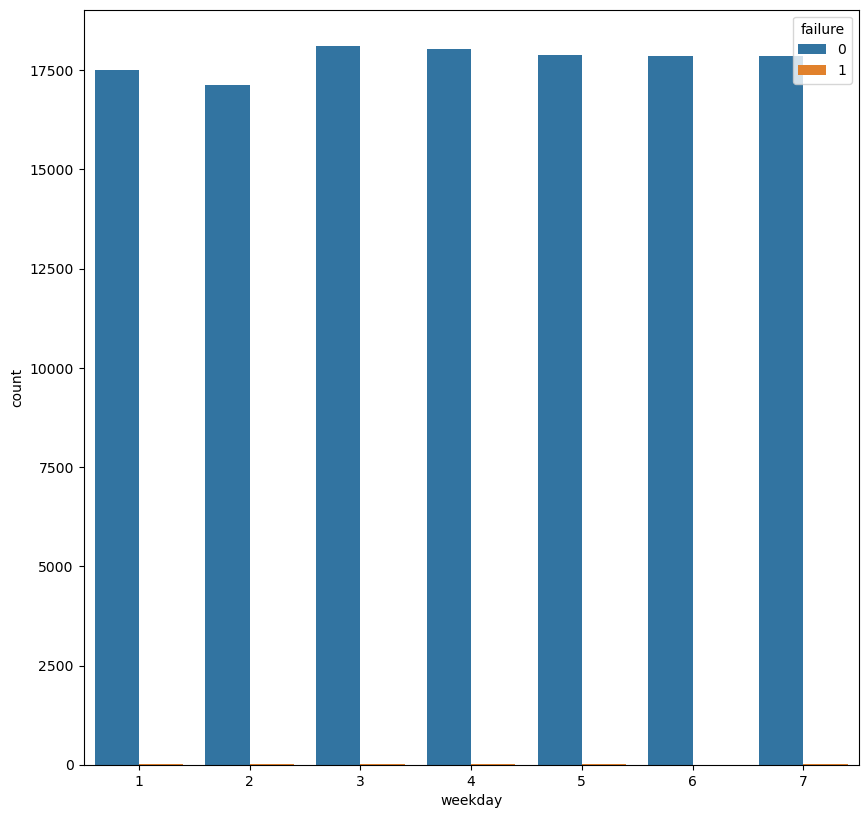

In [26]:
plt.figure(figsize=(10,10),dpi=100)
sns.countplot(x='weekday',hue='failure',data=data)

From the above graph we can conclude that no device fails on weekday-6

# Feature Engineering
A number of steps are to be performed. The order would be:-
1. Handling null & missing values
2. Handling Outliers
3. Categorical encoding (if required)
4. Data transformation

<AxesSubplot:>

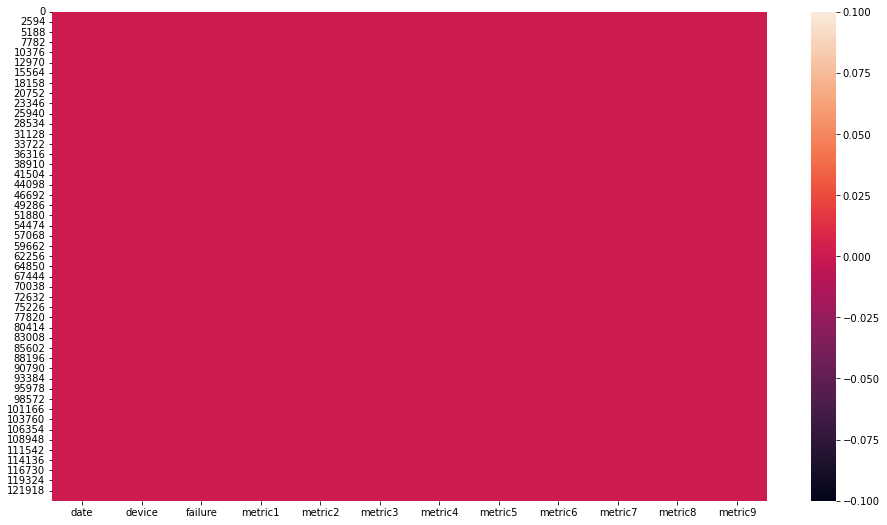

In [27]:
# Handling Null values
# From this we can conclude that no null values/ missing values are present
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [28]:
# Handling Outliers
# unskewed_cols = [columns for columns in num_vars if ((data[columns].skew())) > 1 | (data[columns].skew()<-1)]

# for columns in unskewed_cols:
#     data[columns] = np.where(data[columns]<data[columns].quantile(.15),data[columns].quantile(.15),data[columns])
#     data[columns] = np.where(data[columns]>data[columns].quantile(.85),data[columns].quantile(.85),data[columns])
# data.skew(numeric_only=True)

A seperate df of all failure instances has been created for analysis

In [29]:
failure_df = df.loc[df['failure']==1]
failure_df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
4885,1/5/2015,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
6879,1/7/2015,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
8823,1/9/2015,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,8,0
11957,1/13/2015,W1F13SRV,1,188251248,2040,0,0,6,39345,32,32,1
12668,1/14/2015,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
109927,8/4/2015,W1F1CB5E,1,16043296,88,0,0,9,30,0,0,0
114251,8/18/2015,Z1F0MRPJ,1,65654088,0,0,0,9,298592,0,0,11
122118,10/5/2015,S1F0JGJV,1,13739704,0,0,18,8,343760,0,0,0
122808,10/9/2015,Z1F14BGY,1,85259320,0,0,164,8,262932,0,0,0


In [30]:
unskewed_cols = [columns for columns in num_vars if ((failure_df[columns].skew())) > 1 | (failure_df[columns].skew()<-1) and columns!='metric2']
for columns in unskewed_cols:
    failure_df[columns] = np.where(failure_df[columns]<failure_df[columns].quantile(.15),-1,failure_df[columns])
    failure_df[columns] = np.where(failure_df[columns]>failure_df[columns].quantile(.85),-1,failure_df[columns])

C:\Users\sharm\AppData\Local\Temp/ipykernel_17428/1919582136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failure_df[columns] = np.where(failure_df[columns]<failure_df[columns].quantile(.15),-1,failure_df[columns])
C:\Users\sharm\AppData\Local\Temp/ipykernel_17428/1919582136.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failure_df[columns] = np.where(failure_df[columns]>failure_df[columns].quantile(.85),-1,failure_df[columns])


In [31]:
failure_df['metric2'] = np.where(failure_df['metric2']<failure_df['metric2'].quantile(.15),-1,failure_df['metric2'])
failure_df

C:\Users\sharm\AppData\Local\Temp/ipykernel_17428/1134284519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failure_df['metric2'] = np.where(failure_df['metric2']<failure_df['metric2'].quantile(.15),-1,failure_df['metric2'])


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
4885,1/5/2015,S1F0RRB1,1,48467332,64776,0,-1,8,39267,-1,-1,1
6879,1/7/2015,S1F0CTDN,1,184069720,528,0,4,9,387871,-1,-1,3
8823,1/9/2015,W1F0PNA5,1,136429411,64784,0,-1,-1,224801,8,8,0
11957,1/13/2015,W1F13SRV,1,188251248,2040,0,0,-1,39345,-1,-1,1
12668,1/14/2015,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
109927,8/4/2015,W1F1CB5E,1,16043296,88,0,0,9,30,0,0,0
114251,8/18/2015,Z1F0MRPJ,1,65654088,0,0,0,9,298592,0,0,-1
122118,10/5/2015,S1F0JGJV,1,13739704,0,0,18,8,343760,0,0,0
122808,10/9/2015,Z1F14BGY,1,85259320,0,0,-1,8,262932,0,0,0


In [32]:
l=[3,4,5,7,8,9]
for i in l:
    print(f'metric{i}', failure_df[f'metric{i}'].value_counts()[-1])

metric3 11
metric4 15
metric5 25
metric7 16
metric8 16
metric9 13


In [33]:
outlier_data = df.copy()

unskewed_cols = [columns for columns in num_vars if ((outlier_data[columns].skew())) > 1 | (outlier_data[columns].skew()<-1) and columns!='metric2']
for columns in unskewed_cols:
    outlier_data[columns] = np.where(outlier_data[columns]<outlier_data[columns].quantile(.15),-1,outlier_data[columns])
    outlier_data[columns] = np.where(outlier_data[columns]>outlier_data[columns].quantile(.85),-1,outlier_data[columns])

outlier_data['metric2'] = np.where(outlier_data['metric2']<outlier_data['metric2'].quantile(.15),-1,outlier_data['metric2'])
outlier_data

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,-1,-1,407438,0,0,-1
1,1/1/2015,S1F0166B,0,61370680,0,-1,0,-1,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,-1,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,-1,-1,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,-1,-1,11,332792,0,0,-1
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [34]:
l=[3,4,5,7,8,9]
for i in l:
    print(f'metric{i}', outlier_data[f'metric{i}'].value_counts()[-1])

metric3 9135
metric4 9338
metric5 32506
metric7 1458
metric8 1458
metric9 17701


From the above 3 cells, we can conclude that the failure instance arent outliers. And thus we can handle outliers by replacing them. But we first pass the data without treating them. If required we will treat them

# Feature Selection

In [35]:
# Dropping constant features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df.drop(['date','device'],axis=1))

var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Thus no constant columns are present.

In [36]:
# Dropping correalted columns
# We already know that metric7&8 are correlated. Thus we will drop metric7
df.drop(['metric7'],axis=1,inplace=True)
df

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,3
...,...,...,...,...,...,...,...,...,...,...,...
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0


<AxesSubplot:>

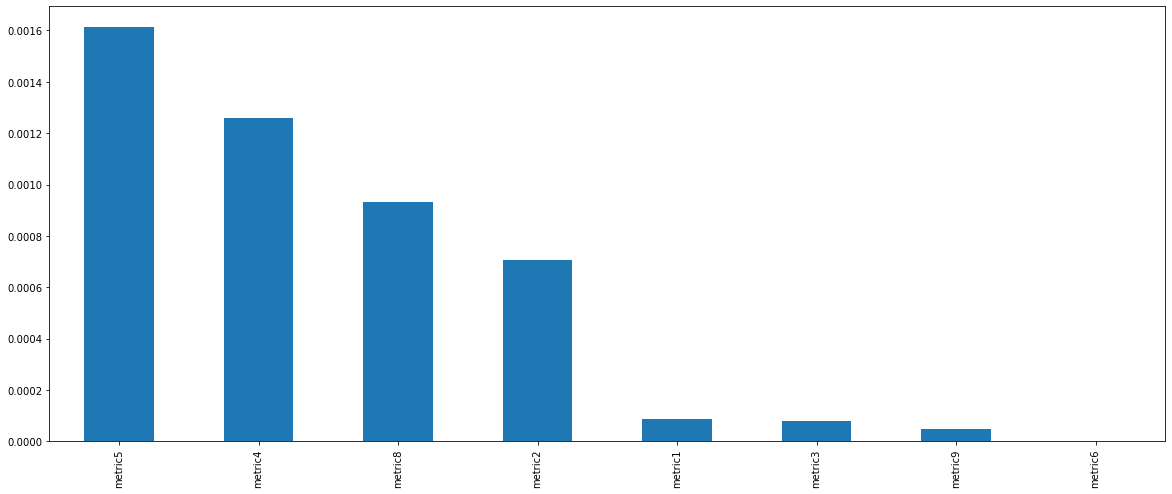

In [37]:
tempx = df.drop(['date','device','failure'],axis=1)
tempy = df['failure']

from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(tempx, tempy)
mutual_info

mutual_info = pd.Series(mutual_info)
mutual_info.index = tempx.columns
mutual_info.sort_values(ascending=False)
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Data Transformation
As we had previously seen various transformation. Based on that we would using normalization transformation

In [38]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X=df.drop(['date','device','failure'],axis=1)
y=df['failure']
y=np.array(y)

X=scaler.fit_transform(X)

# Oversampling
As a very few instances device failure are present, we will have to in order to avoid model becoming baised towards one class oversample the failure instances. There are several ways of sampling (Eg:- Smote,TomekLinks etc). We would be using Randomoversampler here.

In [39]:
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42)

rus = RandomOverSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
X_res.shape

(199014, 8)

# Cross-validation
Now we would be doing cross-validation. We have chosen 2 models:- RandomForest & Gradient Boosting algorithm. There several ways of doing cross-validation. Here we have chosen repeated train-test split validation. Since it is the combination of traditional train-test split & k-fold cross validation. It randonly does train-test split & then does k-fold validation

In [40]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
results=cross_val_score(model,X,y,cv=ssplit)
print(results)

[0.99943773 0.99919675 0.99895578 0.99931724 0.99899594 0.99903611
 0.99907627 0.9993574  0.99891562 0.99911643]


In [41]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

model =GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
results=cross_val_score(model,X,y,cv=ssplit)
print(results)

[0.99903611 0.99883529 0.99895578 0.99923692 0.99899594 0.99871481
 0.99859432 0.99919675 0.99919675 0.99895578]


# Model Creation
Here we chosen 2 models:- RF & GradBoost. As we know that Gradient Boost (& also RF) works well with imbalanced data, we have chosen. If required we will be using other algorithms

0.9989959436121932


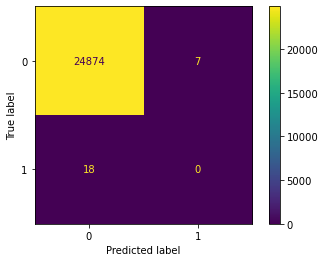

In [61]:

Model = RandomForestClassifier(n_estimators=500,random_state=42,n_jobs=-1)

Model.fit(X_res,y_res)
print(Model.score(X_test,y_test))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(Model, X_test, y_test)

This is a case of overfitting, Since true -ve is 0. A possible reason could be high value of n_estimator parameter. 

# Hyperparameter tuning

In [66]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_distributions = {
    "n_estimators": [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": loguniform(0.01, 1),
}

search_cv = RandomizedSearchCV(
    GradientBoostingClassifier(), param_distributions=param_distributions,
    scoring=['accuracy','f1'], n_iter=20, random_state=0, n_jobs=-1, refit=False)
print(search_cv)

RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002DA1909CD30>,
                                        'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, refit=False, scoring=['accuracy', 'f1'])


0.9514036708301539


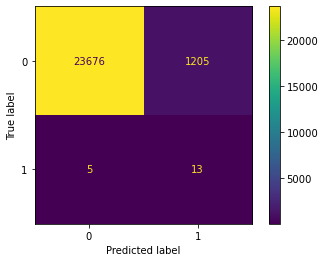

In [67]:
model =GradientBoostingClassifier(n_estimators=800,learning_rate=0.01,random_state=42)
model.fit(X_res,y_res)
print(model.score(X_test,y_test))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [44]:
# For self reference
# y_test
# unique,counts = np.unique(y_test, return_counts=True)
# print(np.asarray((unique, counts)).T)

In [51]:
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.metrics import confusion_matrix, accuracy_score
model = GradientBoostingClassifier(n_estimators=275,learning_rate=0.01,random_state=42)
model.fit(X_res,y_res)
y_pred=model.predict(X_test)

accuracy_score(y_test, y_pred)
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.94      0.72      0.97      0.82      0.69     24881
          1       0.01      0.72      0.94      0.02      0.82      0.66        18

avg / total       1.00      0.94      0.72      0.97      0.82      0.69     24899



From the above outputs we can conclude that gradientboosting is a well-performing algorothim. We have used geometric_mean & iba especially for imbalanced binary classification. 

Many things could have been done. Eg:- More EDAs. We can find if there is any relation between device failure & device types, their duration time, expiry dates etc. 
Also more cross-validation techniques could have been performed, more number of models could have been tested.
More hyparameter tuning techniques & automl libraries could have been used. But due to time constraint we had to restrict ourself to this much.